### 0. Libraries

In [201]:
import pymysql
from sqlalchemy import create_engine
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import numpy as np
from datetime import date
from sklearn.preprocessing import StandardScaler

### 1. Create a DataFrame and make a copy

In [202]:
data=pd.read_csv('marketing_customer_analysis.csv')

In [203]:
data_c = data

### 2. EDA, cleaning and wrangling the data

In [204]:
data_c.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


- ***Standardizing header names***

In [205]:
cols = []
for i in range(len(data_c.columns)):
    cols.append(data_c.columns[i].lower().replace(' ', '_'))
cols

['customer',
 'state',
 'customer_lifetime_value',
 'response',
 'coverage',
 'education',
 'effective_to_date',
 'employmentstatus',
 'gender',
 'income',
 'location_code',
 'marital_status',
 'monthly_premium_auto',
 'months_since_last_claim',
 'months_since_policy_inception',
 'number_of_open_complaints',
 'number_of_policies',
 'policy_type',
 'policy',
 'renew_offer_type',
 'sales_channel',
 'total_claim_amount',
 'vehicle_class',
 'vehicle_size']

In [206]:
data_c.columns=cols

In [207]:
data_c.head()

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


- ***Missing Data***

In [208]:
data_c.isna().mean().round(4) *100

customer                         0.0
state                            0.0
customer_lifetime_value          0.0
response                         0.0
coverage                         0.0
education                        0.0
effective_to_date                0.0
employmentstatus                 0.0
gender                           0.0
income                           0.0
location_code                    0.0
marital_status                   0.0
monthly_premium_auto             0.0
months_since_last_claim          0.0
months_since_policy_inception    0.0
number_of_open_complaints        0.0
number_of_policies               0.0
policy_type                      0.0
policy                           0.0
renew_offer_type                 0.0
sales_channel                    0.0
total_claim_amount               0.0
vehicle_class                    0.0
vehicle_size                     0.0
dtype: float64

In [209]:
data_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   customer                       9134 non-null   object 
 1   state                          9134 non-null   object 
 2   customer_lifetime_value        9134 non-null   float64
 3   response                       9134 non-null   object 
 4   coverage                       9134 non-null   object 
 5   education                      9134 non-null   object 
 6   effective_to_date              9134 non-null   object 
 7   employmentstatus               9134 non-null   object 
 8   gender                         9134 non-null   object 
 9   income                         9134 non-null   int64  
 10  location_code                  9134 non-null   object 
 11  marital_status                 9134 non-null   object 
 12  monthly_premium_auto           9134 non-null   i

Result: There are no NaN.

- ***check the datatypes***

In [210]:
data_c.dtypes

customer                          object
state                             object
customer_lifetime_value          float64
response                          object
coverage                          object
education                         object
effective_to_date                 object
employmentstatus                  object
gender                            object
income                             int64
location_code                     object
marital_status                    object
monthly_premium_auto               int64
months_since_last_claim            int64
months_since_policy_inception      int64
number_of_open_complaints          int64
number_of_policies                 int64
policy_type                       object
policy                            object
renew_offer_type                  object
sales_channel                     object
total_claim_amount               float64
vehicle_class                     object
vehicle_size                      object
dtype: object

In [211]:
data_c.head()

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


- ***change the column effective_to_date from object to date***

In [212]:
data_c['effective_to_date'] = pd.to_datetime(data_c['effective_to_date'], errors='coerce')

In [213]:
data_c.dtypes

customer                                 object
state                                    object
customer_lifetime_value                 float64
response                                 object
coverage                                 object
education                                object
effective_to_date                datetime64[ns]
employmentstatus                         object
gender                                   object
income                                    int64
location_code                            object
marital_status                           object
monthly_premium_auto                      int64
months_since_last_claim                   int64
months_since_policy_inception             int64
number_of_open_complaints                 int64
number_of_policies                        int64
policy_type                              object
policy                                   object
renew_offer_type                         object
sales_channel                           

- ***Transform the time variables (day, week and month) to integers.***

In [214]:
data_c['day'] = pd.DatetimeIndex(data_c['effective_to_date']).day

In [215]:
data_c['month'] = pd.DatetimeIndex(data_c['effective_to_date']).month

In [216]:
data_c['weeknumber'] = pd.DatetimeIndex(data_c['effective_to_date']).week

<ipython-input-216-f47953e2e7fa>:1: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  data_c['weeknumber'] = pd.DatetimeIndex(data_c['effective_to_date']).week


In [217]:
data_c.head()

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,day,month,weeknumber
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274,...,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize,24,2,8
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,0,...,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize,31,1,5
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,48767,...,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize,19,2,7
3,WW63253,California,7645.861827,No,Basic,Bachelor,2011-01-20,Unemployed,M,0,...,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize,20,1,3
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2011-02-03,Employed,M,43836,...,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize,3,2,5




Result: The column 'effective_to_date' is split into day, month and week. The column 'effective_to_date' will remove from the dataset.



In [218]:
data_c = data_c.drop(['effective_to_date'], axis=1)

In [219]:
data_c.head()

,customer,state,customer_lifetime_value,response,coverage,education,employmentstatus,gender,income,location_code,...,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,day,month,weeknumber
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,Employed,F,56274,Suburban,...,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize,24,2,8
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,Unemployed,F,0,Suburban,...,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize,31,1,5
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,Employed,F,48767,Suburban,...,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize,19,2,7
3,WW63253,California,7645.861827,No,Basic,Bachelor,Unemployed,M,0,Suburban,...,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize,20,1,3
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,Employed,M,43836,Rural,...,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize,3,2,5


In [220]:
data_c.dtypes

customer                          object
state                             object
customer_lifetime_value          float64
response                          object
coverage                          object
education                         object
employmentstatus                  object
gender                            object
income                             int64
location_code                     object
marital_status                    object
monthly_premium_auto               int64
months_since_last_claim            int64
months_since_policy_inception      int64
number_of_open_complaints          int64
number_of_policies                 int64
policy_type                       object
policy                            object
renew_offer_type                  object
sales_channel                     object
total_claim_amount               float64
vehicle_class                     object
vehicle_size                      object
day                                int64
month           

- ***Split the dataset into data_num (only numerical data) only to check the outliers.***

In [221]:
data_num = data_c.select_dtypes(include = np.number)

 *** Check the outliers in the numerical data***
 - using the boxplot to visalize the outliers and describe()-function

In [222]:
calc_data_num = data_num.describe()
calc_data_num

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount,day,month,weeknumber
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794,15.461134,1.463762,6.160499
std,6870.967608,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092,8.653770,0.498712,8.864645
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007,1.000000,1.000000,1.000000
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244,8.000000,1.000000,3.000000
50%,5780.182197,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434,15.000000,1.000000,5.000000
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839,23.000000,2.000000,7.000000
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678,31.000000,2.000000,52.000000


***- Calculate the borders (whisker) for Outliers***

In [223]:
Q1 = data_c.quantile(q=0.25)
Q1

customer_lifetime_value          3994.251794
income                              0.000000
monthly_premium_auto               68.000000
months_since_last_claim             6.000000
months_since_policy_inception      24.000000
number_of_open_complaints           0.000000
number_of_policies                  1.000000
total_claim_amount                272.258244
day                                 8.000000
month                               1.000000
weeknumber                          3.000000
Name: 0.25, dtype: float64

In [224]:
Q3 = data_c.quantile(q=0.75)
Q3

customer_lifetime_value           8962.167041
income                           62320.000000
monthly_premium_auto               109.000000
months_since_last_claim             23.000000
months_since_policy_inception       71.000000
number_of_open_complaints            0.000000
number_of_policies                   4.000000
total_claim_amount                 547.514839
day                                 23.000000
month                                2.000000
weeknumber                           7.000000
Name: 0.75, dtype: float64

In [225]:
IQR = Q3-Q1
IQR

customer_lifetime_value           4967.915247
income                           62320.000000
monthly_premium_auto                41.000000
months_since_last_claim             17.000000
months_since_policy_inception       47.000000
number_of_open_complaints            0.000000
number_of_policies                   3.000000
total_claim_amount                 275.256594
day                                 15.000000
month                                1.000000
weeknumber                           4.000000
dtype: float64

In [226]:
lower_whisker = Q1 - IQR*1,5
lower_whisker

(customer_lifetime_value           -973.663453
 income                          -62320.000000
 monthly_premium_auto                27.000000
 months_since_last_claim            -11.000000
 months_since_policy_inception      -23.000000
 number_of_open_complaints            0.000000
 number_of_policies                  -2.000000
 total_claim_amount                  -2.998350
 day                                 -7.000000
 month                                0.000000
 weeknumber                          -1.000000
 dtype: float64,
 5)

In [227]:
upper_whisker = Q3 + IQR*1,5
upper_whisker

(customer_lifetime_value           13930.082288
 income                           124640.000000
 monthly_premium_auto                150.000000
 months_since_last_claim              40.000000
 months_since_policy_inception       118.000000
 number_of_open_complaints             0.000000
 number_of_policies                    7.000000
 total_claim_amount                  822.771433
 day                                  38.000000
 month                                 3.000000
 weeknumber                           11.000000
 dtype: float64,
 5)

***Visualization of the outliers***

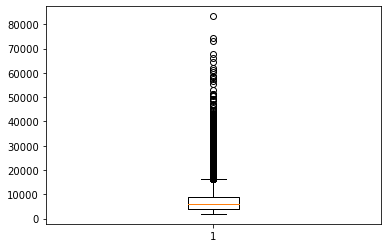

In [228]:
plt.boxplot(data_num['customer_lifetime_value'])
plt.show()

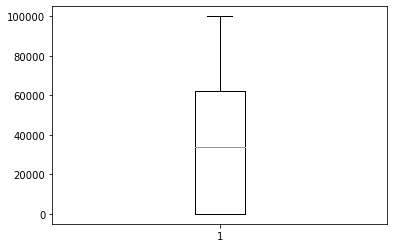

In [229]:
plt.boxplot(data_num['income'])
plt.show()

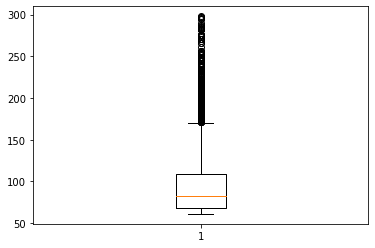

In [230]:
plt.boxplot(data_num['monthly_premium_auto'])
plt.show()

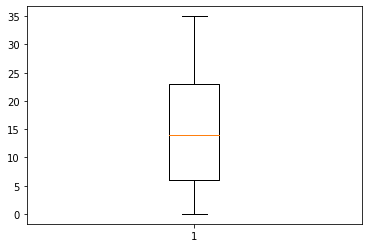

In [231]:
plt.boxplot(data_num['months_since_last_claim'])
plt.show()

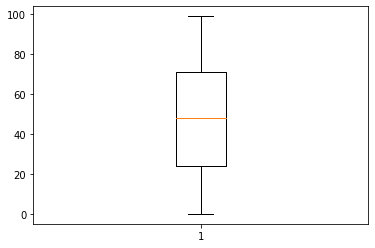

In [232]:
plt.boxplot(data_num['months_since_policy_inception'])
plt.show()

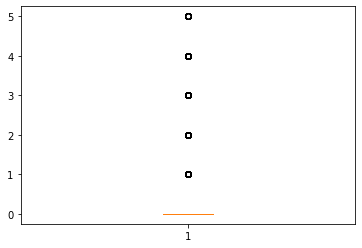

In [233]:
plt.boxplot(data_num['number_of_open_complaints'])
plt.show()

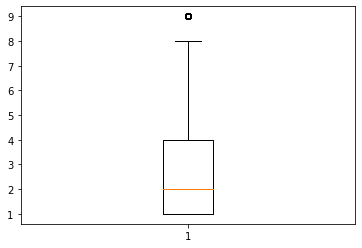

In [234]:
plt.boxplot(data_num['number_of_policies'])
plt.show()

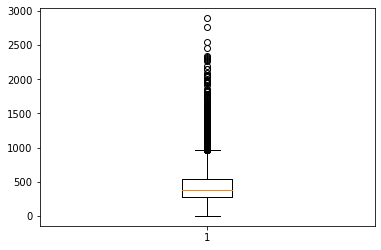

In [235]:
plt.boxplot(data_num['total_claim_amount'])
plt.show()

*** What to do with outliers?***

Hint: Cap or drop
Cap: do not exaggerate
Drop: make sure it's not a typing mistake, drop outliers with significant impact

-> I capped the outliers.

***'number_of_policies'***

In [236]:
Upper_lim1 = data_c['number_of_policies'].quantile(0.95) 
Upper_lim1

8.0

In [237]:
Lower_lim1 = data_c['number_of_policies'].quantile(0.05)
Lower_lim1

1.0

In [238]:
data_c.loc[(data_c['number_of_policies']> Upper_lim1), 'number_of_policies']

6       9
74      9
94      9
96      9
98      9
       ..
8991    9
9006    9
9011    9
9017    9
9106    9
Name: number_of_policies, Length: 416, dtype: int64

In [239]:
# There are no outliers below the lower_lim1
#data_c.loc[(data_c['number_of_policies']< Lower_lim1), 'number_of_policies']

In [240]:
data_c = data_c.drop(data_c[data_c.number_of_policies > Upper_lim1].index)

In [241]:
data_c.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8718 entries, 0 to 9133
Data columns (total 26 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   customer                       8718 non-null   object 
 1   state                          8718 non-null   object 
 2   customer_lifetime_value        8718 non-null   float64
 3   response                       8718 non-null   object 
 4   coverage                       8718 non-null   object 
 5   education                      8718 non-null   object 
 6   employmentstatus               8718 non-null   object 
 7   gender                         8718 non-null   object 
 8   income                         8718 non-null   int64  
 9   location_code                  8718 non-null   object 
 10  marital_status                 8718 non-null   object 
 11  monthly_premium_auto           8718 non-null   int64  
 12  months_since_last_claim        8718 non-null   i

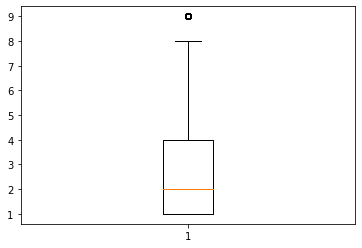

In [242]:
plt.boxplot(data_num['number_of_policies'])
plt.show()

***'customer_lifetime_value'***

In [243]:
Upper_lim2 = data_c['customer_lifetime_value'].quantile(0.95) 
Upper_lim2

22316.673308499998

In [244]:
Lower_lim2 = data_c['customer_lifetime_value'].quantile(0.05)
Lower_lim2

2470.0702388

In [245]:
data_c.loc[(data_c['customer_lifetime_value']> Upper_lim2), 'customer_lifetime_value']

8       24127.50402
22      24127.50402
50      36707.42639
51      33473.34946
63      24261.01777
           ...     
9062    30205.01297
9097    30104.51969
9110    34611.37896
9122    25464.82059
9129    23405.98798
Name: customer_lifetime_value, Length: 436, dtype: float64

In [246]:
data_c.loc[(data_c['customer_lifetime_value'] < Lower_lim2), 'customer_lifetime_value']

23      2450.190996
24      2392.107890
30      2454.583540
44      2443.665166
49      2294.478927
           ...     
9023    2117.989147
9024    2290.681171
9069    2224.555883
9080    2230.275142
9120    2114.738469
Name: customer_lifetime_value, Length: 436, dtype: float64

In [247]:
data_c = data_c.drop(data_c[data_c.customer_lifetime_value > Upper_lim2].index)

In [248]:
data_c = data_c.drop(data_c[data_c.customer_lifetime_value < Lower_lim2].index)

In [249]:
data_c.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7846 entries, 0 to 9133
Data columns (total 26 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   customer                       7846 non-null   object 
 1   state                          7846 non-null   object 
 2   customer_lifetime_value        7846 non-null   float64
 3   response                       7846 non-null   object 
 4   coverage                       7846 non-null   object 
 5   education                      7846 non-null   object 
 6   employmentstatus               7846 non-null   object 
 7   gender                         7846 non-null   object 
 8   income                         7846 non-null   int64  
 9   location_code                  7846 non-null   object 
 10  marital_status                 7846 non-null   object 
 11  monthly_premium_auto           7846 non-null   int64  
 12  months_since_last_claim        7846 non-null   i

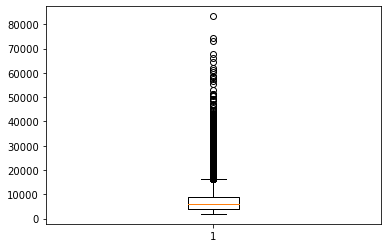

In [250]:
plt.boxplot(data_num['customer_lifetime_value'])
plt.show()

***'monthly_premium_auto'***

In [251]:
Upper_lim3 = data_c['monthly_premium_auto'].quantile(0.95) 
Upper_lim3

154.0

In [252]:
Lower_lim3 = data_c['monthly_premium_auto'].quantile(0.05)
Lower_lim3

63.0

In [253]:
data_c.loc[(data_c['monthly_premium_auto']> Upper_lim3), 'monthly_premium_auto']

31      237
45      172
123     192
143     168
181     217
       ... 
9020    176
9026    213
9096    177
9103    195
9125    185
Name: monthly_premium_auto, Length: 392, dtype: int64

In [254]:
data_c.loc[(data_c['monthly_premium_auto'] < Lower_lim3), 'monthly_premium_auto']

34      62
97      62
102     62
167     61
182     62
        ..
8958    62
9042    62
9060    61
9081    61
9092    61
Name: monthly_premium_auto, Length: 352, dtype: int64

In [255]:
data_c = data_c.drop(data_c[data_c.monthly_premium_auto > Upper_lim3].index)

In [256]:
data_c = data_c.drop(data_c[data_c.monthly_premium_auto < Lower_lim3].index)

In [257]:
data_c.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7102 entries, 0 to 9133
Data columns (total 26 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   customer                       7102 non-null   object 
 1   state                          7102 non-null   object 
 2   customer_lifetime_value        7102 non-null   float64
 3   response                       7102 non-null   object 
 4   coverage                       7102 non-null   object 
 5   education                      7102 non-null   object 
 6   employmentstatus               7102 non-null   object 
 7   gender                         7102 non-null   object 
 8   income                         7102 non-null   int64  
 9   location_code                  7102 non-null   object 
 10  marital_status                 7102 non-null   object 
 11  monthly_premium_auto           7102 non-null   int64  
 12  months_since_last_claim        7102 non-null   i

***'total_claim_amount'***

In [258]:
Upper_lim4 = data_c['total_claim_amount'].quantile(0.95) 
Lower_lim4 = data_c['total_claim_amount'].quantile(0.05)

In [259]:
data_c.loc[(data_c['total_claim_amount']> Upper_lim4), 'total_claim_amount']

1       1131.464935
42       882.871945
54       831.625979
62       863.327324
73       982.399613
           ...     
9035     978.257137
9038     873.127345
9078     880.435943
9107    1027.000029
9109    1254.177129
Name: total_claim_amount, Length: 356, dtype: float64

In [260]:
data_c.loc[(data_c['total_claim_amount'] < Lower_lim4), 'total_claim_amount']

15      42.920271
41      18.918935
71       5.434505
76      29.034160
80      25.807685
          ...    
8915     3.406136
8925    29.828668
8945    44.159065
8949    10.367410
9113     6.880385
Name: total_claim_amount, Length: 356, dtype: float64

In [261]:
data_c = data_c.drop(data_c[data_c.total_claim_amount > Upper_lim4].index)
data_c = data_c.drop(data_c[data_c.total_claim_amount < Lower_lim4].index)
data_c.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6390 entries, 0 to 9133
Data columns (total 26 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   customer                       6390 non-null   object 
 1   state                          6390 non-null   object 
 2   customer_lifetime_value        6390 non-null   float64
 3   response                       6390 non-null   object 
 4   coverage                       6390 non-null   object 
 5   education                      6390 non-null   object 
 6   employmentstatus               6390 non-null   object 
 7   gender                         6390 non-null   object 
 8   income                         6390 non-null   int64  
 9   location_code                  6390 non-null   object 
 10  marital_status                 6390 non-null   object 
 11  monthly_premium_auto           6390 non-null   int64  
 12  months_since_last_claim        6390 non-null   i

- ***Now split the dataset into data_num (only numerical data) and data_cat (only object).***

In [262]:
data_num = data_c.select_dtypes(include = np.number)

In [263]:
data_cat = data_c.select_dtypes(include = np.object)

<ipython-input-263-631f6870589b>:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  data_cat = data_c.select_dtypes(include = np.object)


In [264]:
data_cat.head()

,customer,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,BU79786,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize
5,OC83172,Oregon,Yes,Basic,Bachelor,Employed,F,Rural,Married,Personal Auto,Personal L3,Offer2,Web,Two-Door Car,Medsize


In [265]:
data_num.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount,day,month,weeknumber
0,2763.519279,56274,69,32,5,0,1,384.811147,24,2,8
2,12887.431650,48767,108,18,38,0,2,566.472247,19,2,7
3,7645.861827,0,106,18,65,0,7,529.881344,20,1,3
4,2813.692575,43836,73,12,44,0,1,138.130879,3,2,5
5,8256.297800,62902,69,14,94,0,2,159.383042,25,1,4


- ***Check the categorical data (the content of the rows - typing mistakes, summarize similar groups ..... )***

In [266]:
data_cat['state'].value_counts()

California    2250
Oregon        1788
Arizona       1176
Nevada         624
Washington     552
Name: state, dtype: int64

In [267]:
data_cat['response'].value_counts()

No     5448
Yes     942
Name: response, dtype: int64

In [268]:
data_cat['coverage'].value_counts()

Basic       3833
Extended    2068
Premium      489
Name: coverage, dtype: int64

In [269]:
data_cat['education'].value_counts()

Bachelor                1896
College                 1896
High School or Below    1804
Master                   534
Doctor                   260
Name: education, dtype: int64

In [270]:
data_cat['employmentstatus'].value_counts()

Employed         4195
Unemployed       1422
Medical Leave     299
Disabled          274
Retired           200
Name: employmentstatus, dtype: int64

In [271]:
data_cat['gender'].value_counts()

F    3271
M    3119
Name: gender, dtype: int64

In [272]:
data_cat['location_code'].value_counts()

Suburban    4052
Urban       1281
Rural       1057
Name: location_code, dtype: int64

In [273]:
data_cat['marital_status'].value_counts()

Married     3877
Single      1531
Divorced     982
Name: marital_status, dtype: int64

In [274]:
data_cat['policy_type'].value_counts()

Personal Auto     4764
Corporate Auto    1350
Special Auto       276
Name: policy_type, dtype: int64

In [275]:
data_cat['policy'].value_counts()

Personal L3     2416
Personal L2     1493
Personal L1      855
Corporate L3     680
Corporate L2     417
Corporate L1     253
Special L2       122
Special L3       107
Special L1        47
Name: policy, dtype: int64

In [276]:
data_cat['sales_channel'].value_counts()

Agent          2408
Branch         1790
Call Center    1260
Web             932
Name: sales_channel, dtype: int64

In [277]:
data_cat['renew_offer_type'].value_counts()

Offer1    2544
Offer2    2115
Offer3    1001
Offer4     730
Name: renew_offer_type, dtype: int64

In [278]:
data_cat['vehicle_class'].value_counts()

Four-Door Car    3419
Two-Door Car     1393
SUV              1256
Sports Car        322
Name: vehicle_class, dtype: int64

In [279]:
data_cat['vehicle_size'].value_counts()

Medsize    4479
Small      1236
Large       675
Name: vehicle_size, dtype: int64

- ****possible groupings (For me: Possible summarizeng depends at first on the hypothesis. But I try to summarize similar groups together. The goal is to achieve bigger groups and less distinct groups and of cours less distinct categorical values )***

***-> column "education"***

- It could be possible to put the education level doctor and master in one group. After that, the both in one group make the group bigger. The both separate is too small.
- new name for the degree doctor and master = Higher_degree

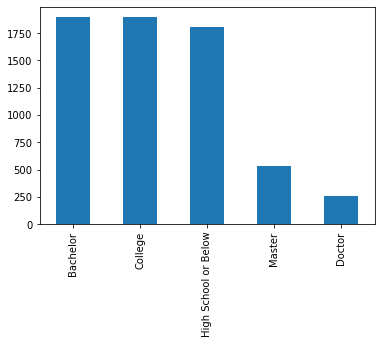

<Figure size 432x288 with 0 Axes>

In [280]:
data_cat["education"].value_counts().plot(kind="bar")
plt.figure();

In [281]:
def col_education(x):
    if 'Bachelor' in x:
        return 'Bachelor'
    elif 'College' in x:
        return 'College'
    elif 'High School or Below' in x:
        return 'High School or Below'
    elif 'Master' or 'Doctor' in x:
        return 'Higher_degree'
    else:
        return 'unknown'

In [282]:
data_cat['education'] = data_cat['education'].apply(col_education)

<ipython-input-282-e819e8410822>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cat['education'] = data_cat['education'].apply(col_education)


In [283]:
data_cat['education'].value_counts()

Bachelor                1896
College                 1896
High School or Below    1804
Higher_degree            794
Name: education, dtype: int64

***-> column 'employmentstatus'***
- summarize the group 'Medical Leave','Disabled' and 'Retired' to the new group "no_participation_work_life"

<Figure size 432x288 with 0 Axes>

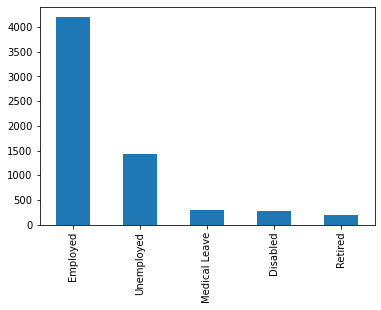

<Figure size 432x288 with 0 Axes>

In [284]:
data_cat["employmentstatus"].value_counts().plot(kind="bar")
plt.figure()

In [285]:
def col_employmentstatus(x):
    if 'Employed' in x:
        return 'Employed'
    elif 'Unemployed' in x:
        return 'Unemployed'
    elif x in ['Medical Leave','Disabled','Retired']:
        return 'no_participation_work_life'
    else:
        return 'unknown'

In [286]:
data_cat['employmentstatus'] = data_cat['employmentstatus'].apply(col_employmentstatus)

<ipython-input-286-63cd4d4a8fe7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cat['employmentstatus'] = data_cat['employmentstatus'].apply(col_employmentstatus)


In [287]:
data_cat['employmentstatus'].value_counts()

Employed                      4195
Unemployed                    1422
no_participation_work_life     773
Name: employmentstatus, dtype: int64

***-> column 'vehicle_class'***

summarize the group 'Sports Car ','Luxury SUV' and 'Luxury Car' to the new group "Luxury"

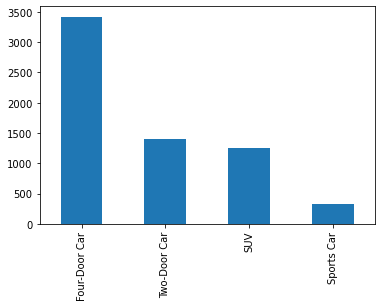

<Figure size 432x288 with 0 Axes>

In [288]:
data_cat["vehicle_class"].value_counts().plot(kind="bar")
plt.figure();

In [289]:
def col_vehicle_class(x):
    if 'Four-Door Car' in x:
        return 'Four-Door Car'
    elif 'Two-Door Car' in x:
        return 'Two-Door Car'
    elif 'SUV' in x:
        return 'SUV'
    elif x in ['Sports Car','Luxury SUV','Luxury Car']:
        return 'Luxury'
    else:
        return 'unknown'

In [290]:
data_cat['vehicle_class'] = data_cat['vehicle_class'].apply(col_vehicle_class)

<ipython-input-290-3b6a097a6460>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cat['vehicle_class'] = data_cat['vehicle_class'].apply(col_vehicle_class)


In [291]:
data_cat['vehicle_class'].value_counts()

Four-Door Car    3419
Two-Door Car     1393
SUV              1256
Luxury            322
Name: vehicle_class, dtype: int64

- Normalize the continuous variables.

Standard Scaler: standardising all numeric features / rescaling using

In [292]:
transformer = StandardScaler().fit(data_num)
x_standardized = transformer.transform(data_num)

In [293]:
num_new = pd.DataFrame(x_standardized, columns=data_num.columns)

In [294]:
num_new.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount,day,month,weeknumber
0,-1.016120,0.552963,-0.899125,1.687846,-1.547183,-0.417002,-0.855380,-0.058033,0.991871,1.072749,0.193762
1,1.516639,0.304407,0.950912,0.290640,-0.358763,-0.417002,-0.378635,0.956933,0.414266,1.072749,0.083371
2,0.205324,-1.310261,0.856038,0.290640,0.613580,-0.417002,2.005089,0.752495,0.529787,-0.932184,-0.358190
3,-1.003568,0.141142,-0.709378,-0.308163,-0.142687,-0.417002,-0.855380,-1.436270,-1.434068,1.072749,-0.137409
4,0.358041,0.772415,-0.899125,-0.108562,1.657949,-0.417002,-0.378635,-1.317531,1.107392,-0.932184,-0.247800


- Encode the categorical variables

Using get_dummies

In [295]:
cat_new = pd.get_dummies(data_cat, columns=['customer','state', 'response', 'coverage', 'education','employmentstatus','gender','location_code','marital_status','policy_type', 'policy', 'renew_offer_type','sales_channel','vehicle_class','vehicle_size'], drop_first=True)


In [296]:
cat_new.head()

,customer_AA35519,customer_AA56476,customer_AA69265,customer_AA71604,customer_AB13432,customer_AB21519,customer_AB23825,customer_AB26022,customer_AB45325,customer_AB60627,...,renew_offer_type_Offer3,renew_offer_type_Offer4,sales_channel_Branch,sales_channel_Call Center,sales_channel_Web,vehicle_class_Luxury,vehicle_class_SUV,vehicle_class_Two-Door Car,vehicle_size_Medsize,vehicle_size_Small
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,1,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,1,0


- check the lengths to avoid mismatches

In [300]:
len(data_num), len(x_standardized), len(cat_new)

(6390, 6390, 6390)

In [301]:
new_data = np.concatenate((cat_new, num_new), axis=1)

In [302]:
new_data.shape

(6390, 6438)

- Since the model will only accept numerical data, check and make sure that every column is numerical, if some are not, change it using encoding.